In [4]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
import matplotlib.cm as cm
%matplotlib inline
from sklearn import preprocessing
from subprocess import check_output


In [6]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.shape

(569, 33)

In [10]:
df = df.drop('id', axis = 1)
df = df.drop('Unnamed: 32', axis = 1)
#Mapping Malignant to 1
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
#data scalling
data = pd.DataFrame(preprocessing.scale(df.iloc[:,1:32]))
data.columns = list(df.iloc[ : ,1:32].columns)
data['diagnosis'] = df['diagnosis']

drop_data = data.drop('diagnosis', axis = 1)
X = drop_data.values
#2d visualization
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(X)

C:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.000s...
[t-SNE] Computed neighbors for 569 samples in 0.078s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.522404
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.483177
[t-SNE] KL divergence after 2550 iterations: 0.897326


Text(0.5, 1.0, 'Actual clusters')

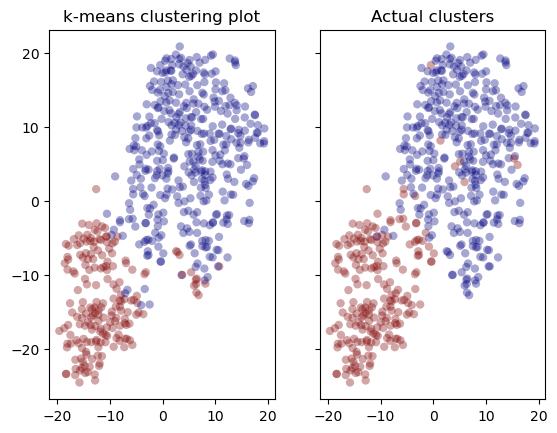

In [16]:
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters = 2, init = "k-means++", n_init = 10, max_iter=300, tol=0.0001)
kY = kmns.fit_predict(X)

f, (ax1, ax2) = plt.subplots(1, 2, sharey = True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = data['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')